<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
KNN
training accuracy:
0.7704280155642024
test accuracy:
0.7204724409448819
Decision tree
training accuracy:
0.8988326848249028
test accuracy:
0.7204724409448819
Mlp
training accuracy:
0.7645914396887159
test accuracy:
0.7047244094488189


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mlp scaled
training accuracy:
0.8365758754863813
test accuracy:
0.7283464566929134


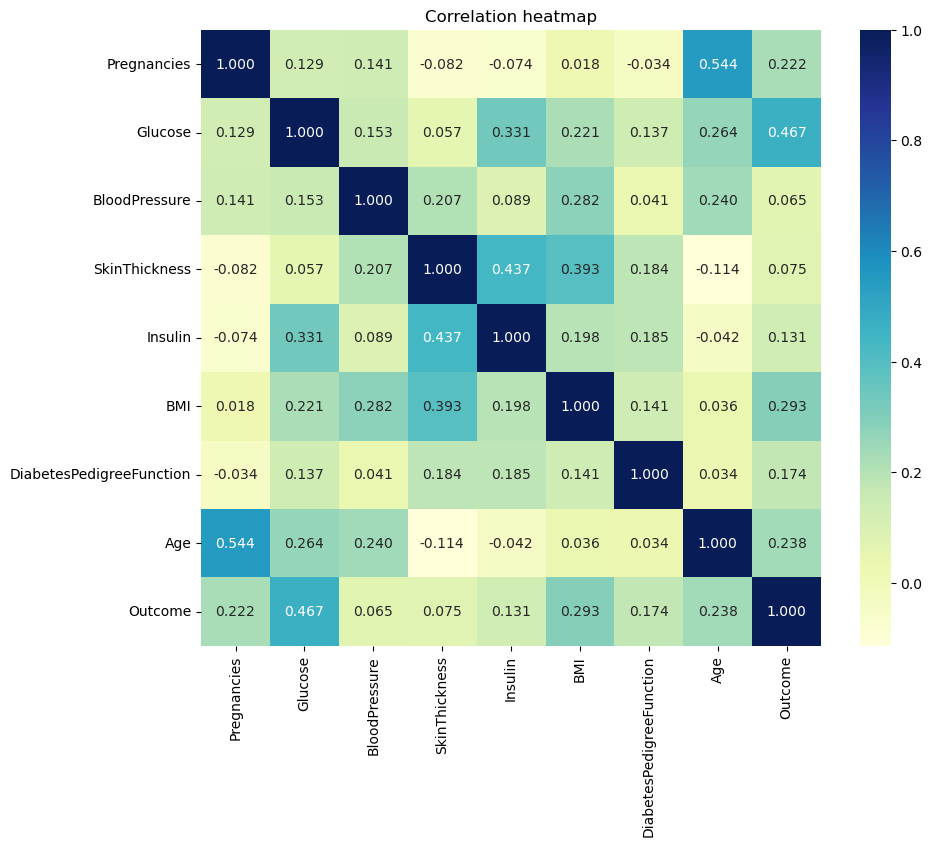

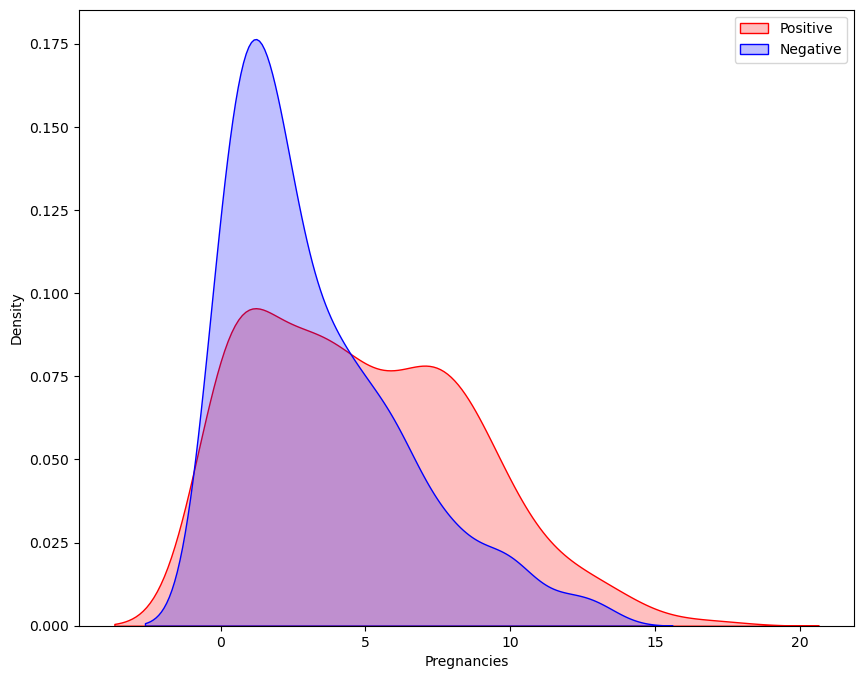

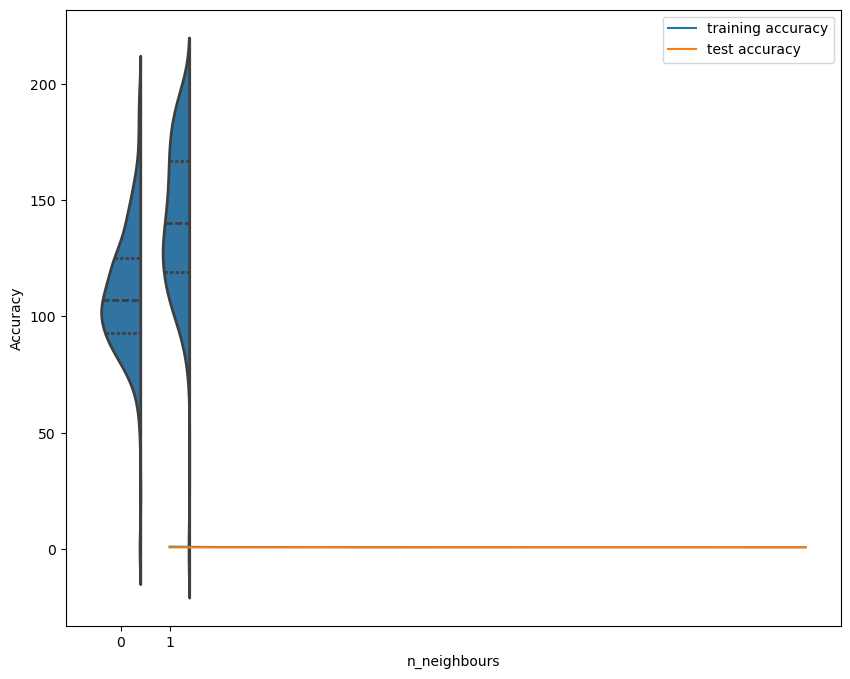

In [27]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import dataset
dataset=pd.read_csv("diabetes.csv")
dataset.info()

#data visualization
# plot of correlationship between independent variables
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True,fmt=".3f",cmap="YlGnBu")
plt.title("Correlation heatmap")
plt.figure(figsize=(10,8))
#plotting density function graph  of the pregnancies and target variables
kde=sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==1],color="Red",fill=True)
kde=sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==0],color="Blue",fill=True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(["Positive","Negative"])
#exploring glucose and target variables
plt.figure(figsize=(10,8))
sns.violinplot(data=dataset,x="Outcome",y="Glucose",split=True,linewidth=2,inner="quart")
dataset["Glucose"]=dataset["Glucose"].replace(0,dataset["Glucose"].median())
dataset["BloodPressure"]=dataset["BloodPressure"].replace(0,dataset["BloodPressure"].median())
dataset["SkinThickness"]=dataset["SkinThickness"].replace(0,dataset["SkinThickness"].median())
dataset["Insulin"]=dataset["Insulin"].replace(0,dataset["Insulin"].median())
dataset["BMI"]=dataset["BMI"].replace(0,dataset["BMI"].median())
#datapreparation
X=dataset.drop(["Outcome"],axis=1)
y=dataset["Outcome"]
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
#building of the ml model
#KNN
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
for n_neighbors in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)

    #accuracy score
    training_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))
plt.plot(range(1,15),training_accuracy,label="training accuracy")
plt.plot(range(1,15),test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbours")
plt.legend()
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,y_train)
print("KNN")
print("training accuracy:")
print(knn.score(X_train,y_train))
print("test accuracy:")
print(knn.score(X_test,y_test))

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0,max_depth=8)
dt.fit(X_train,y_train)
print("Decision tree")
print("training accuracy:")
print(dt.score(X_train,y_train))
print("test accuracy:")
print(dt.score(X_test,y_test))

from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)
print("Mlp")
print("training accuracy:")
print(mlp.score(X_train,y_train))
print("test accuracy:")
print(mlp.score(X_test,y_test))

#scaled
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)
mlp1=MLPClassifier(random_state=0)
mlp1.fit(X_train_scaled,y_train)
print("Mlp scaled")
print("training accuracy:")
print(mlp1.score(X_train_scaled,y_train))
print("test accuracy:")
print(mlp1.score(X_test_scaled,y_test))



